# Comparison of Machine Learning Models for the Prediction of Cervical Cancer


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from xgboost.sklearn import XGBClassifier
from mlens.ensemble import SuperLearner
from mlens.model_selection import Evaluator
from mlens.metrics import make_scorer
from sklearn.metrics import accuracy_score, log_loss,recall_score,precision_score,f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import numpy as np

[MLENS] backend: threading


# Load the dataset and Data cleaning 

**Load the data:** Data Source: https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29;
Excel file was downloded from the data source

In [2]:
df = pd.read_csv('risk_factors_cervical_cancer.csv', na_values="?")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

**Count of NaN's in each feature**

In [3]:
df.isna().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

The 2 factors missing values for over 90% of the records are: 
1. STDs:Time since first diagnosis
2. STDs: Time since last diagnosis

**Replace Nan's by mean**

In [4]:
df.fillna(df.mean(), inplace=True)

**Convert columns to categories**

In [5]:
cols = df.columns
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')   
df.dtypes

Age                                     int64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                         

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,858.0,26.820513,8.497948,13.0,20.000000,25.000000,32.000000,84.0
Number of sexual partners,858.0,2.527644,1.642267,1.0,2.000000,2.000000,3.000000,28.0
First sexual intercourse,858.0,16.995300,2.791883,10.0,15.000000,17.000000,18.000000,32.0
Num of pregnancies,858.0,2.275561,1.399325,0.0,1.000000,2.000000,3.000000,11.0
Smokes,858.0,0.145562,0.350189,0.0,0.000000,0.000000,0.000000,1.0
Smokes (years),858.0,1.219721,4.057885,0.0,0.000000,0.000000,0.000000,37.0
Smokes (packs/year),858.0,0.453144,2.209657,0.0,0.000000,0.000000,0.000000,37.0
Hormonal Contraceptives,858.0,0.641333,0.448671,0.0,0.000000,1.000000,1.000000,1.0
Hormonal Contraceptives (years),858.0,2.256419,3.519082,0.0,0.000000,1.000000,2.256419,30.0
IUD,858.0,0.112011,0.293260,0.0,0.000000,0.000000,0.000000,1.0


# Exploratory Data Analysis

**Correlation Matrix for all features**

In [7]:
corr =df.corr()
corr

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
Age,1.000000,0.084896,0.369168,0.526137,0.055813,0.217349,0.131180,0.065624,0.277181,0.267662,...,1.038467e-01,1.241061e-01,0.110340,0.061443,0.101722,0.092635,-0.003967,0.103283,-0.016862,0.055956
Number of sexual partners,0.084896,1.000000,-0.147937,0.076719,0.238078,0.177117,0.175153,0.006342,0.018552,0.030005,...,1.845105e-02,2.750885e-02,0.022309,0.015691,0.027264,0.022982,-0.039273,-0.008899,0.021839,-0.001429
First sexual intercourse,0.369168,-0.147937,1.000000,-0.058223,-0.123602,-0.058366,-0.056332,0.018344,0.008000,-0.020975,...,1.821408e-02,2.552411e-02,0.067283,-0.032626,0.043966,0.035750,-0.016546,0.003493,-0.010971,0.007262
Num of pregnancies,0.526137,0.076719,-0.058223,1.000000,0.080768,0.174912,0.097044,0.142858,0.207839,0.198550,...,5.920202e-02,7.532020e-02,0.035123,0.007344,0.046753,0.019025,0.038685,0.087687,-0.029656,0.043460
Smokes,0.055813,0.238078,-0.123602,0.080768,1.000000,0.723128,0.493361,-0.002165,0.044157,-0.051184,...,2.288757e-02,3.089067e-02,-0.011027,-0.042822,0.012210,-0.067614,0.034527,0.053613,-0.003913,0.029091
Smokes (years),0.217349,0.177117,-0.058366,0.174912,0.723128,1.000000,0.724116,-0.011002,0.048899,0.027562,...,5.224318e-02,5.965181e-02,0.054674,-0.030966,0.057214,-0.048894,0.071232,0.094640,-0.006750,0.061484
Smokes (packs/year),0.131180,0.175153,-0.056332,0.097044,0.493361,0.724116,1.000000,0.005880,0.040112,0.007891,...,3.786900e-02,4.157514e-02,0.108476,-0.021127,0.110366,-0.033358,0.026662,0.017954,0.004613,0.024657
Hormonal Contraceptives,0.065624,0.006342,0.018344,0.142858,-0.002165,-0.011002,0.005880,1.000000,0.448574,0.033729,...,2.270225e-02,3.961605e-02,0.026407,-0.003334,0.038038,-0.001723,0.033551,-0.004247,-0.011030,0.007711
Hormonal Contraceptives (years),0.277181,0.018552,0.008000,0.207839,0.044157,0.048899,0.040112,0.448574,1.000000,0.094953,...,7.040922e-02,8.028259e-02,0.054627,0.003086,0.061394,-0.012865,0.038825,0.078707,0.074324,0.078995
IUD,0.267662,0.030005,-0.020975,0.198550,-0.051184,0.027562,0.007891,0.033729,0.094953,1.000000,...,5.811855e-02,6.789279e-02,0.110541,0.051833,0.058154,0.138905,0.044059,0.084074,0.007348,0.051554


** Visualization of Correlation matrix** - Plot Heat Map

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

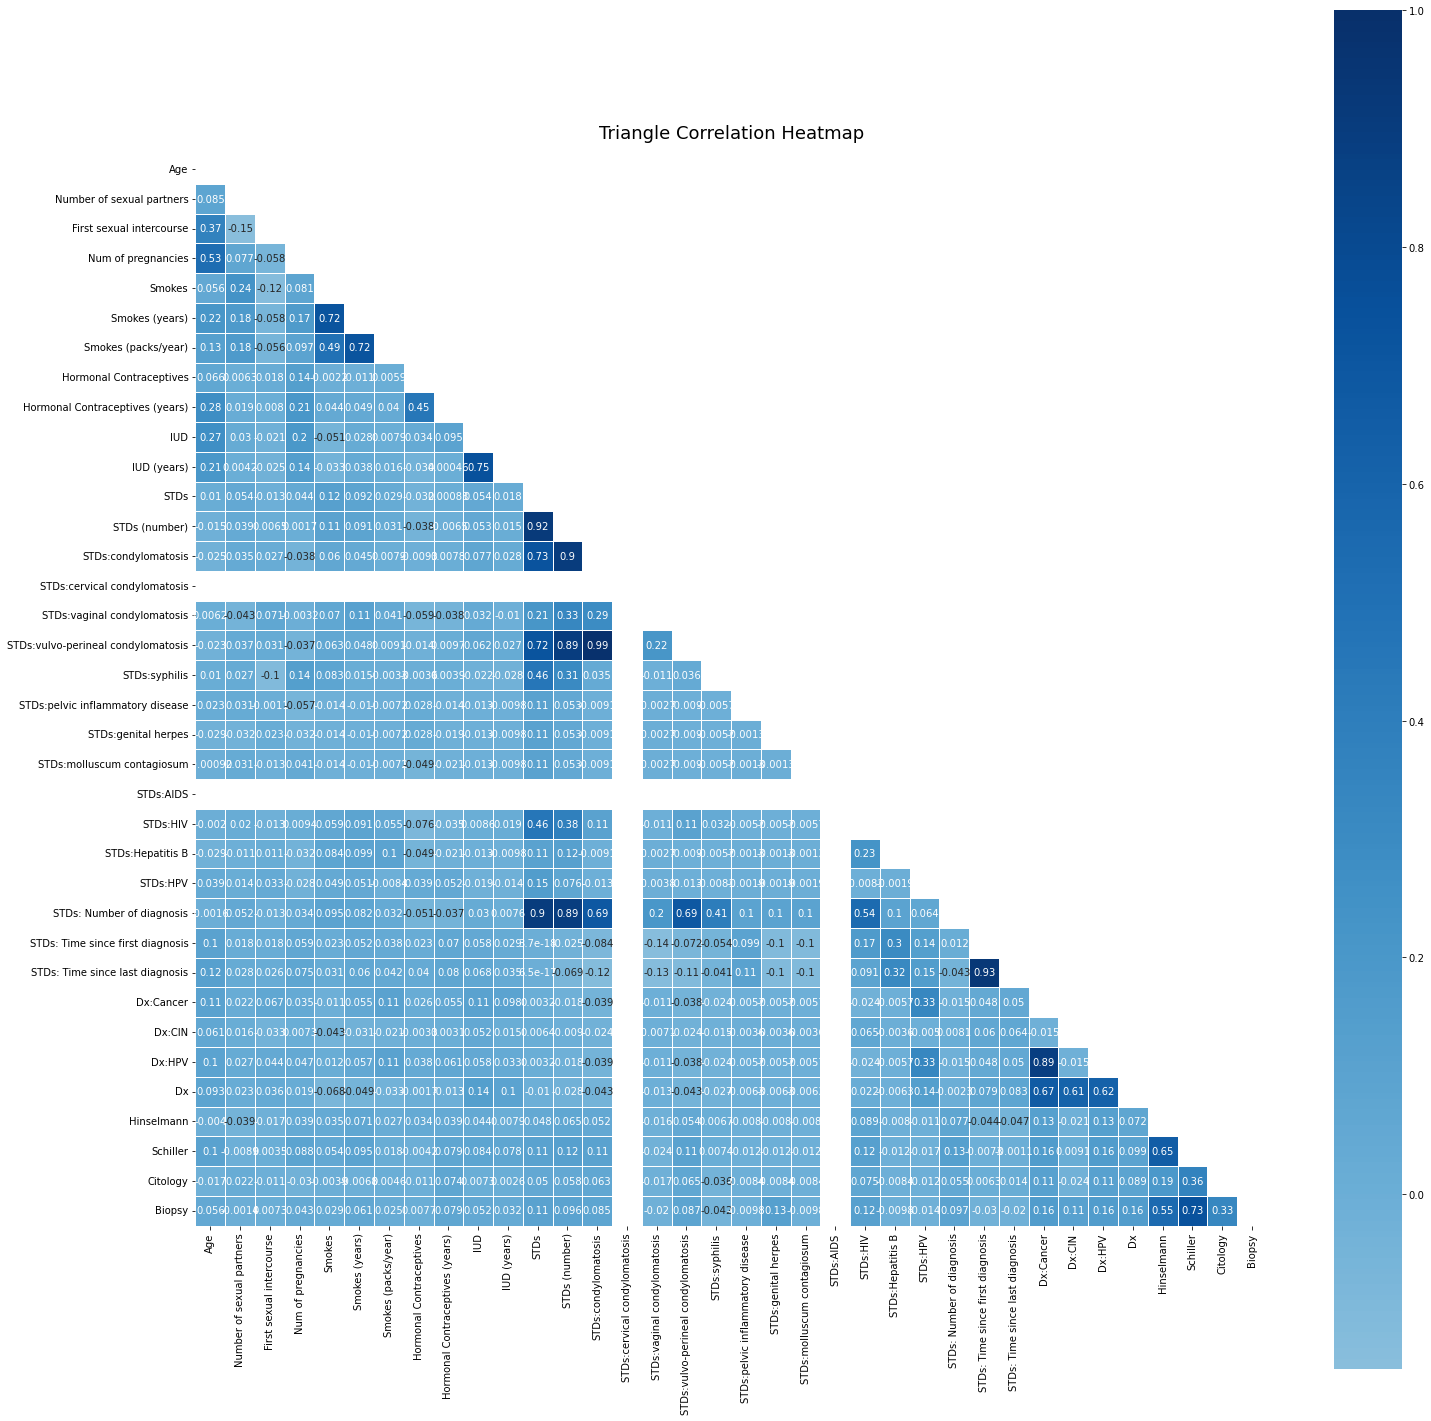

In [8]:
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(24, 50))
heatmap = sns.heatmap(corr, mask=mask, vmax=1, annot=True, cmap='Blues',center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.5})
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

**Correlation with target variable**: 
Check for factors showing obvious correlations with Biopsy

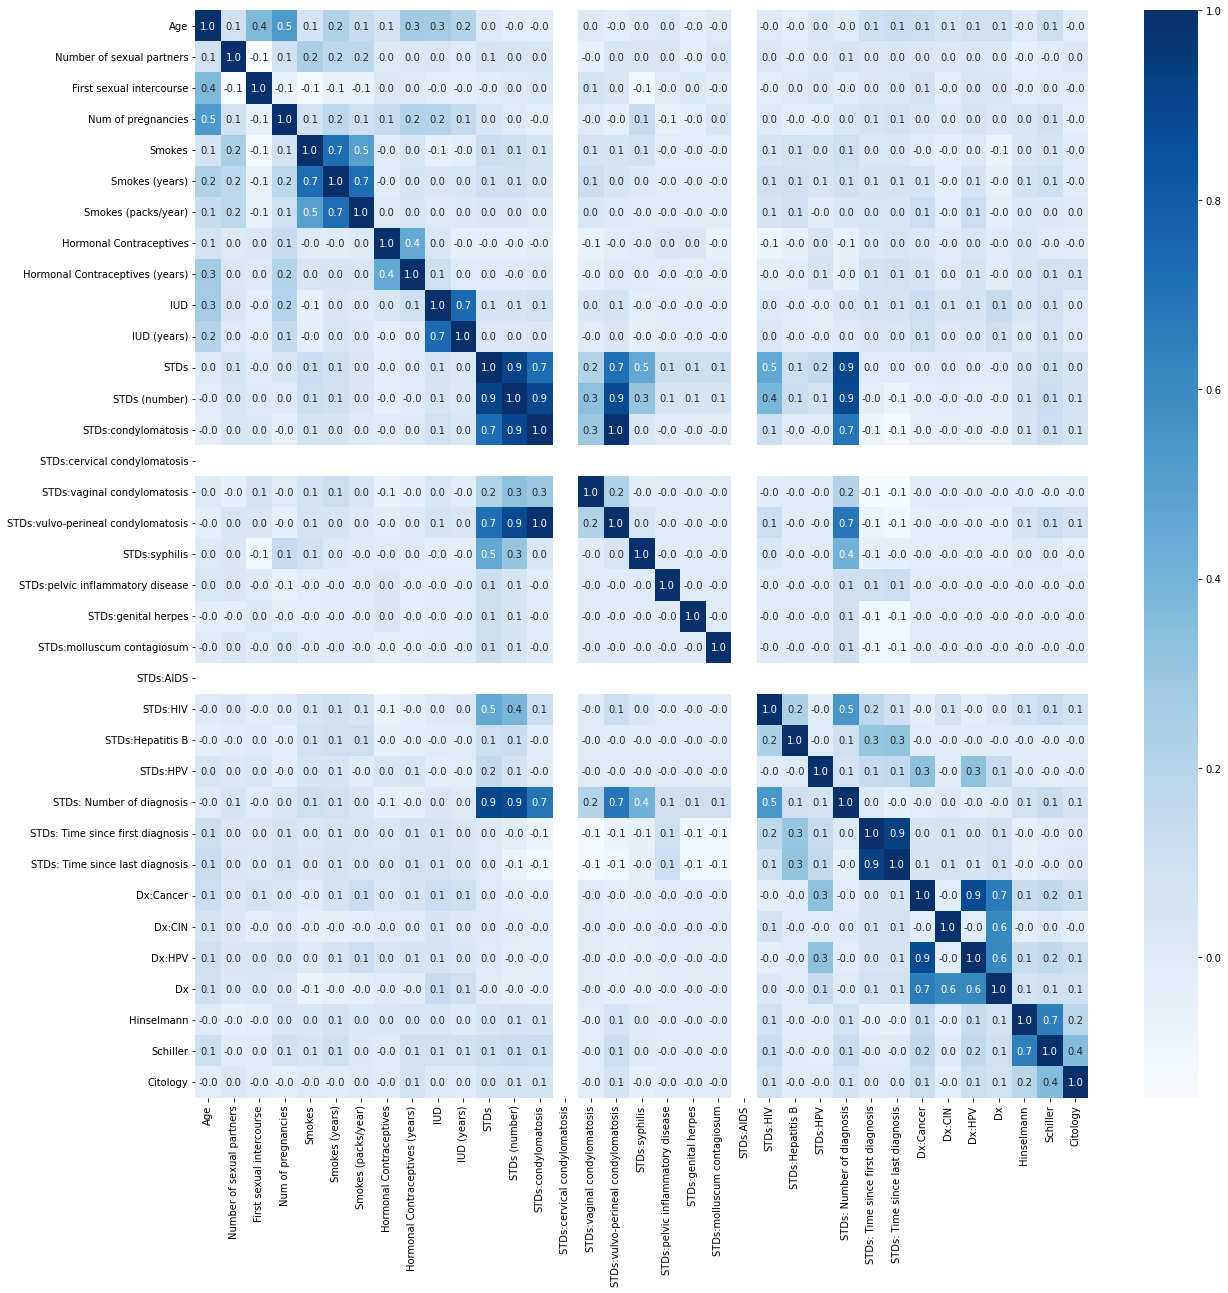

In [9]:
temp_df = df.drop('Biopsy', axis=1)
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(temp_df.loc[:,:].corr(), annot=True, cmap="Blues", fmt='.1f' )
plt.show()

Some features show strong correlation, like "STDs", "STDs (number)", and "STDs: Number of diagnosis", all show signifigant correlations to the individual STD factors and this would be expected.

Also, the following features all show some correlation with age:
Number of sexual partners
First sexual intercourse
Number of pregnancies
Smokes (years)
Hormonal Contraceptives (years)
IUD
IUD (years)

**Correlation matrix of the top 12 factors to the target variable- Biopsy**

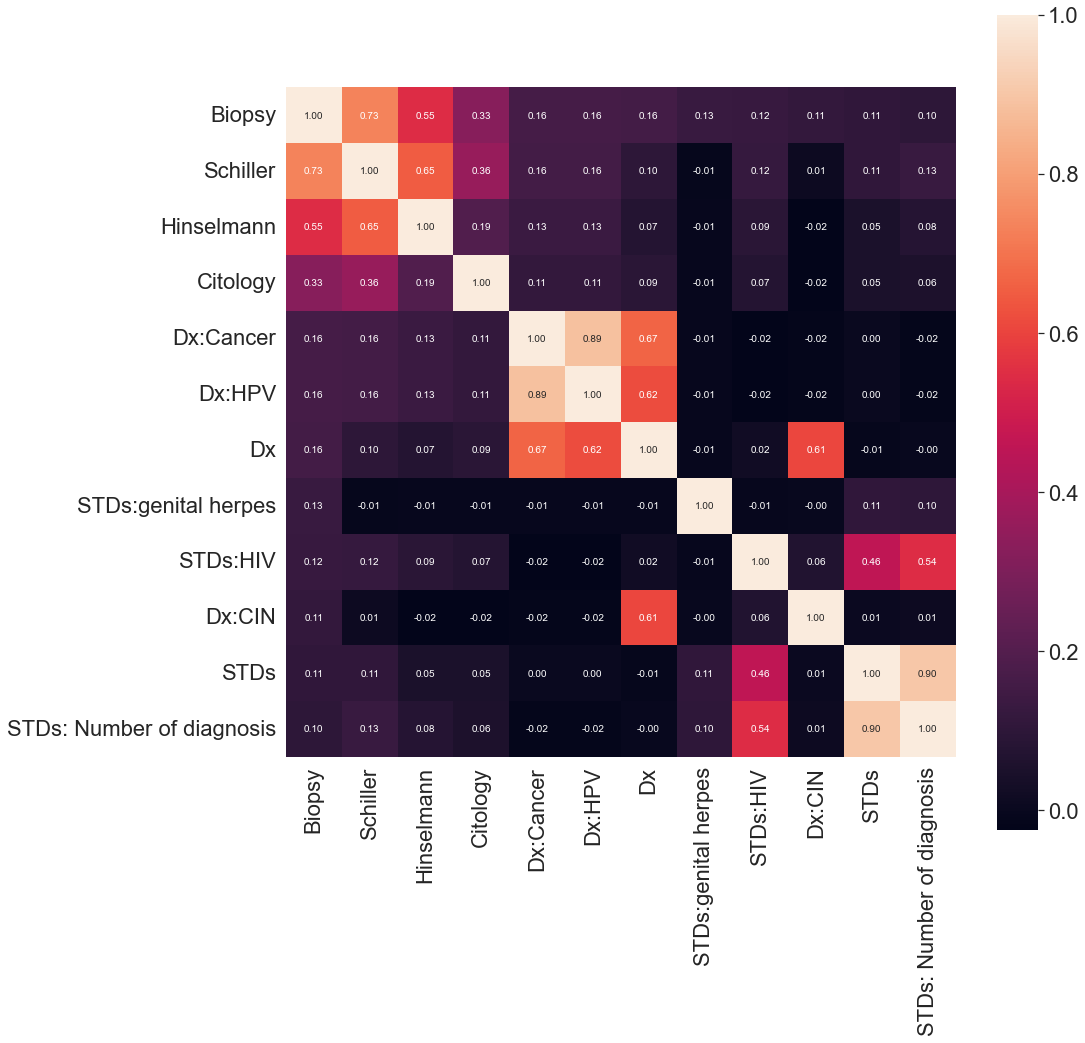

In [10]:
corrmat = df.corr()
k = 12 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Biopsy')['Biopsy'].index
cm = np.corrcoef(df[cols].values.T)

plt.figure(figsize=(15,15))

sns.set(font_scale=2)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values)
plt.show()

It is not suprising to see Schiller, Hinselmann, and Citology features that represent medical diagnostic tools used to identify cervical cancer showning strongest correlations with Biopsy.

**Check for Imbalance**

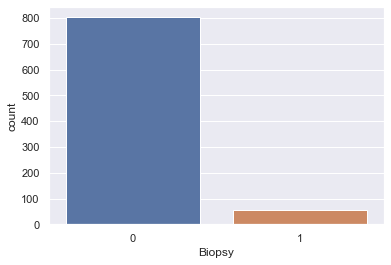

In [11]:
sns.set_theme(style="darkgrid")
ax1 = sns.countplot(x="Biopsy", data=df)

# Training and Testing Machine Learning Models

**Separate the dataset into the predictive factors and the target variable & Preprocessing with StandardScaler**

In [12]:
X = df.drop('Biopsy',axis=1)
X = pd.DataFrame(preprocessing.StandardScaler().fit_transform(X), columns=X.columns)
y = df['Biopsy']
print(y.value_counts())
cols =list(X.columns)


0    803
1     55
Name: Biopsy, dtype: int64


**Train & Test Split**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=555)

**Check for imbalance of test set**

In [14]:
print(y_test.value_counts())

0    206
1      9
Name: Biopsy, dtype: int64


**Smote** - To achieve class balance

In [15]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X, y)
y_train_smote.value_counts()

0    803
1    803
Name: Biopsy, dtype: int64

**PCA analysis**

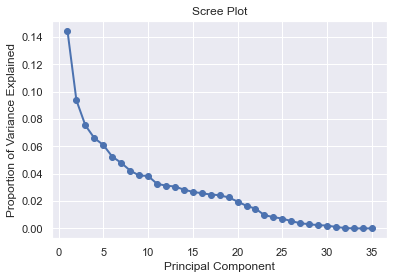

       0                                 1   eigenvalues
0    PC1                     STDs (number)  4.773453e+00
1   PC10          First sexual intercourse  3.091952e+00
2   PC11               STDs:genital herpes  2.488641e+00
3   PC12  STDs:pelvic inflammatory disease  2.179881e+00
4   PC13        STDs:molluscum contagiosum  2.015130e+00
5   PC14         Number of sexual partners  1.733405e+00
6   PC15               STDs:genital herpes  1.581890e+00
7   PC16       STDs:vaginal condylomatosis  1.396869e+00
8   PC17                          Citology  1.276912e+00
9   PC18       STDs:vaginal condylomatosis  1.266534e+00
10  PC19         Number of sexual partners  1.077162e+00
11   PC2                         Dx:Cancer  1.031305e+00
12  PC20                  STDs:Hepatitis B  1.010897e+00
13  PC21   Hormonal Contraceptives (years)  9.359522e-01
14  PC22                            Smokes  8.812490e-01
15  PC23                          Schiller  8.488090e-01
16  PC24                       

In [16]:
pca=PCA(35)
pca.fit_transform(X)
# print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  
# out_sum = np.cumsum(pca.explained_variance_ratio_)  
# print ("Cumulative Prop. Variance Explained: ", out_sum)
# print("PCA explained variance:", pca.explained_variance_)

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'bo-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

n_pcs= pca.components_.shape[0]

# get the index of the most important feature on EACH component i.e. largest absolute value
# using LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = cols
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
# using LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}
# build the dataframe
df_pca = pd.DataFrame(sorted(dic.items()))
#print(df_pca)
eigenvalues = pca.explained_variance_
df_pca['eigenvalues'] = eigenvalues
print(df_pca)

The number of principal components (PC1 to PC12) contribute eigenvalues of 99.80% and absolute value of eigenvectors above 0.5. The PCA has reduced 36 attributes to 12 relevant attributes.

**Creating a dataframe with 12 elevant attributes from PCA analysis**

In [17]:
pca_12= PCA(12)  
pca_12 =pca_12.fit_transform(X)
pca_12_df = pd.DataFrame(data = pca_12)
pca_12_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.803263,-1.141593,-0.240482,0.270595,1.281573,-0.195300,-1.147609,-0.025129,-0.512622,-0.239087,-0.610389,0.076418
1,-0.870349,-1.401957,-0.574748,0.419913,1.362057,0.005308,-1.188705,0.143458,-0.557776,-0.092040,0.027487,-0.388067
2,-0.857812,-0.783023,-0.391864,0.389119,0.386861,-0.230060,-0.599155,0.642353,0.462170,0.981183,-0.329513,-0.122951
3,0.958869,11.828658,8.919255,-7.981400,5.801982,-3.952079,0.522297,2.556510,-0.204340,1.038753,1.382448,0.614093
4,-0.830367,0.929108,0.581849,0.010006,-2.405739,-0.079328,3.193931,-0.133977,1.116268,0.300635,0.062039,0.058794
...,...,...,...,...,...,...,...,...,...,...,...,...
853,-0.828066,-0.799069,-0.320642,0.353492,0.649430,-0.337766,-0.685585,0.740851,0.429223,0.738970,-0.580207,0.296771
854,-0.895919,-0.265577,-0.147057,0.284320,-0.519191,0.005617,1.585754,0.338034,0.368636,-0.216144,0.576292,0.125502
855,-0.707417,-0.499780,-0.898115,0.059234,0.881304,1.670999,0.058229,0.651157,-0.097871,-0.724780,0.115310,0.520779
856,-0.886356,-0.350495,-0.333760,0.369555,-0.479134,-0.309187,1.027474,1.044622,1.184484,1.217617,0.068507,0.287120


**Concatenate Prinicipal Component dataframe with the target variable**:
The original dataframe (858, 36) it is now reduced to (858, 13).

In [18]:
pca_df = pd.concat([pca_12_df, df[["Biopsy"]]], axis = 1)
pca_df

,0,1,2,3,4,5,6,7,8,9,10,11,Biopsy
0,-0.803263,-1.141593,-0.240482,0.270595,1.281573,-0.195300,-1.147609,-0.025129,-0.512622,-0.239087,-0.610389,0.076418,0
1,-0.870349,-1.401957,-0.574748,0.419913,1.362057,0.005308,-1.188705,0.143458,-0.557776,-0.092040,0.027487,-0.388067,0
2,-0.857812,-0.783023,-0.391864,0.389119,0.386861,-0.230060,-0.599155,0.642353,0.462170,0.981183,-0.329513,-0.122951,0
3,0.958869,11.828658,8.919255,-7.981400,5.801982,-3.952079,0.522297,2.556510,-0.204340,1.038753,1.382448,0.614093,0
4,-0.830367,0.929108,0.581849,0.010006,-2.405739,-0.079328,3.193931,-0.133977,1.116268,0.300635,0.062039,0.058794,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,-0.828066,-0.799069,-0.320642,0.353492,0.649430,-0.337766,-0.685585,0.740851,0.429223,0.738970,-0.580207,0.296771,0
854,-0.895919,-0.265577,-0.147057,0.284320,-0.519191,0.005617,1.585754,0.338034,0.368636,-0.216144,0.576292,0.125502,0
855,-0.707417,-0.499780,-0.898115,0.059234,0.881304,1.670999,0.058229,0.651157,-0.097871,-0.724780,0.115310,0.520779,0
856,-0.886356,-0.350495,-0.333760,0.369555,-0.479134,-0.309187,1.027474,1.044622,1.184484,1.217617,0.068507,0.287120,0


**Train and test split of PCA dataframe**

In [19]:
X_pca = pca_df.drop('Biopsy',axis=1)
y_pca = df['Biopsy']
X_pca = pd.DataFrame(preprocessing.StandardScaler().fit_transform(X_pca), columns=X_pca.columns)
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y_pca, test_size = .25, random_state=555)

# 1. SUPER LEARNER ENSEMBLE METHOD (BASE LEARNERS: DECISION TREE WITH BAGGING & META LEARNER: XGBOOST) -Yamini

In [20]:
DTC = DecisionTreeClassifier()
BC = BaggingClassifier(n_estimators = 100)
clf_XGB = XGBClassifier(n_estimators = 100, seed=555, use_label_encoder=False, eval_metric='logloss',num_class= 1)

print("Ensemble method for prediction of Cervical Cancer")
ensemble = SuperLearner(scorer=accuracy_score, folds=10, random_state=555, verbose=2)
ensemble.add([DTC, BC])
ensemble.add_meta(clf_XGB)
ensemble.fit(X_train, y_train)

acc_train = accuracy_score(ensemble.predict(X_train), y_train)
acc_test= accuracy_score(ensemble.predict(X_test), y_test)
print("Accuracy - Train : ", acc_train)
print("Accuracy - Test : ", acc_test)
print("Precision:",metrics.precision_score(ensemble.predict(X_test), y_test))
print("Recall:",metrics.recall_score(ensemble.predict(X_test), y_test))
print("Fit data:\n%r" % ensemble.data)

Ensemble method for prediction of Cervical Cancer

Fitting 2 layers
Processing layer-1             done | 00:00:02
Processing layer-2             done | 00:00:00
Fit complete                        | 00:00:04

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Accuracy - Train :  1.0
Accuracy - Test :  0.9674418604651163

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Precision: 0.8888888888888888

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Recall: 0.5714285714285714
Fit data:
              


Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00


,Predicted No,Predicted Yes
Actual No,200,6
Actual Yes,1,8



Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00


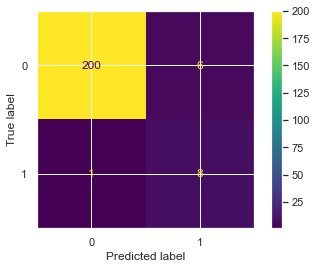

Classification report:


Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00


,precision,recall,f1-score,support
0,0.995025,0.970874,0.982801,206.000000
1,0.571429,0.888889,0.695652,9.000000
accuracy,0.967442,0.967442,0.967442,0.967442
macro avg,0.783227,0.929881,0.839227,215.000000
weighted avg,0.977293,0.967442,0.970781,215.000000


In [21]:
#classification report & confusion matrix
cm=pd.DataFrame(confusion_matrix(y_test, ensemble.predict(X_test)),
    columns=['Predicted No', 'Predicted Yes'],
    index=['Actual No', 'Actual Yes'])
display(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, ensemble.predict(X_test)))
disp.plot()
plt.show()
print("Classification report:\n")
df_report = pd.DataFrame(classification_report(y_test, ensemble.predict(X_test), digits=2,
                                        output_dict=True)).T
df_report


Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00


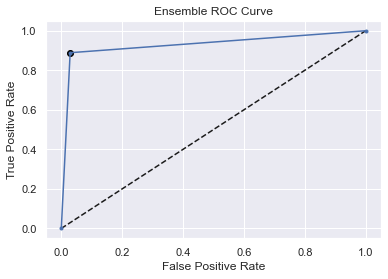


Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Ensemble ROC-AUC score: 0.9298813376483279


In [22]:
#plot roc curve 
fpr2, tpr2, thresholds2 = roc_curve(y_test, ensemble.predict(X_test))
gmeans_nb = np.sqrt(tpr2 * (1-fpr2))
ix_nb = np.argmax(gmeans_nb)
y_hat_nb = np.where(ensemble.predict(X_test) >= thresholds2[ix_nb], 1, 0)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr2, tpr2, marker='.', label='ensemble')
plt.scatter(fpr2[ix_nb], tpr2[ix_nb], marker='o', color='black', label='Best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Ensemble ROC Curve')
plt.show()
auc = metrics.roc_auc_score(y_test, ensemble.predict(X_test))
print("Ensemble ROC-AUC score:",auc)

# 2. SUPER LEARNER ENSEMBLE METHOD (BASE LEARNERS: DECISION TREE WITH BAGGING & META LEARNER: XGBOOST) WITH PCA

Use X_pca_train, X_pca_test, y_pac_train, y_pca_test - Yamini

In [23]:
DTC = DecisionTreeClassifier()
BC = BaggingClassifier(n_estimators = 100)
clf_XGB = XGBClassifier(n_estimators = 100, seed=555, use_label_encoder=False, eval_metric='logloss',num_class= 1)

print("Ensemble method for prediction of Cervical Cancer after PCA")
ensemble_pca = SuperLearner(scorer=accuracy_score, folds=10, random_state=555, verbose=2)
ensemble_pca.add([DTC, BC])
ensemble_pca.add_meta(clf_XGB)
ensemble_pca.fit(X_pca_train, y_pca_train)

acc_train_pca = accuracy_score(ensemble_pca.predict(X_pca_train), y_pca_train)
acc_test_pca= accuracy_score(ensemble_pca.predict(X_pca_test), y_pca_test)
print("Accuracy - Train after PCA: ", acc_train_pca)
print("Accuracy - Test after PCA: ", acc_test_pca)
print("Precision:",metrics.precision_score(ensemble_pca.predict(X_pca_test), y_pca_test))
print("Recall:",metrics.recall_score(ensemble_pca.predict(X_pca_test), y_pca_test))
print("Fit data after PCA:\n%r" % ensemble_pca.data)

Ensemble method for prediction of Cervical Cancer after PCA

Fitting 2 layers
Processing layer-1             done | 00:00:02
Processing layer-2             done | 00:00:00
Fit complete                        | 00:00:02

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Accuracy - Train after PCA:  1.0
Accuracy - Test after PCA:  0.9627906976744186

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Precision: 0.7777777777777778

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Recall: 0.5384615384615


Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00


,Predicted No,Predicted Yes
Actual No,200,6
Actual Yes,2,7



Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00


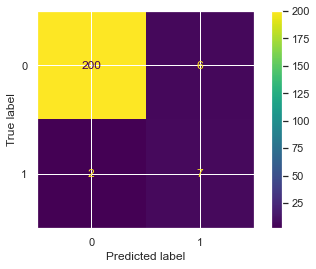

In [24]:
#classification report & confusion matrix
df_report_pca = pd.DataFrame(classification_report(y_pca_test, ensemble_pca.predict(X_pca_test), digits=2,
                                        output_dict=True))
df_report_pca

cm_pca=pd.DataFrame(confusion_matrix(y_pca_test, ensemble_pca.predict(X_pca_test)),
    columns=['Predicted No', 'Predicted Yes'],
    index=['Actual No', 'Actual Yes'])
display(cm_pca)
disp_pca = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_pca_test, ensemble_pca.predict(X_pca_test)))
disp_pca.plot()
plt.show()


Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00


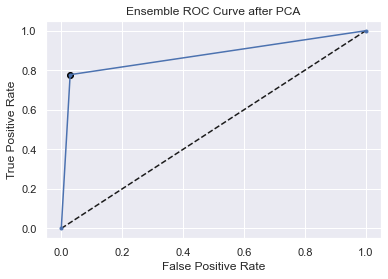


Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Ensemble ROC-AUC score After PCA: 0.8743257820927723


In [25]:
#plot roc curve
fpr2, tpr2, thresholds2 = roc_curve(y_pca_test, ensemble_pca.predict(X_pca_test))
gmeans_nb = np.sqrt(tpr2 * (1-fpr2))
ix_nb = np.argmax(gmeans_nb)
y_hat_pca = np.where(ensemble_pca.predict(X_pca_test) >= thresholds2[ix_nb], 1, 0)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr2, tpr2, marker='.', label='ensemble')
plt.scatter(fpr2[ix_nb], tpr2[ix_nb], marker='o', color='black', label='Best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Ensemble ROC Curve after PCA')
plt.show()
auc_pca = metrics.roc_auc_score(y_test, ensemble_pca.predict(X_pca_test))
print("Ensemble ROC-AUC score After PCA:",auc_pca)

# 3. SUPER LEARNER ENSEMBLE METHOD (BASE LEARNERS: DECISION TREE WITH BAGGING & META LEARNER: XGBOOST) WITH SMOTE 

Use X_train_smote, y_train_smote instead of X_train & y_train - Yamini

In [26]:
DTC = DecisionTreeClassifier()
BC = BaggingClassifier(n_estimators = 100)
clf_XGB = XGBClassifier(n_estimators = 100, seed=555, use_label_encoder=False, eval_metric='logloss',num_class= 1)

print("Ensemble method for prediction of Cervical Cancer")
ensemble_smote = SuperLearner(scorer=accuracy_score, folds=10, random_state=555, verbose=2)
ensemble_smote.add([DTC, BC])
ensemble_smote.add_meta(clf_XGB)
ensemble_smote.fit(X_train_smote, y_train_smote)

acc_train_smote = accuracy_score(ensemble_smote.predict(X_train_smote), y_train_smote)
acc_test_smote= accuracy_score(ensemble_smote.predict(X_test), y_test)
print("Accuracy - Train after smote: ", acc_train_smote)
print("Accuracy - Test after smote: ", acc_test_smote)
print("Precision:",metrics.precision_score(ensemble_smote.predict(X_test), y_test))
print("Recall:",metrics.recall_score(ensemble_smote.predict(X_test), y_test))
print("Fit data after smote:\n%r" % ensemble_smote.data)


Ensemble method for prediction of Cervical Cancer

Fitting 2 layers
Processing layer-1             done | 00:00:03
Processing layer-2             done | 00:00:00
Fit complete                        | 00:00:03

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Accuracy - Train after smote:  1.0
Accuracy - Test after smote:  1.0

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Precision: 1.0

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Recall: 1.0
Fit data after smote:
                         


Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00


,Predicted No,Predicted Yes
Actual No,206,0
Actual Yes,0,9



Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00


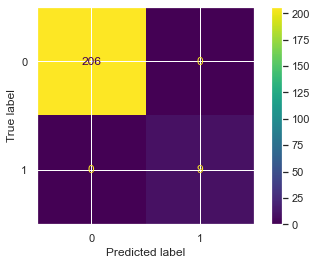

Classification_report after SMOTE:


Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00


,precision,recall,f1-score,support
0,1.0,1.0,1.0,206.0
1,1.0,1.0,1.0,9.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,215.0
weighted avg,1.0,1.0,1.0,215.0


In [27]:
#classification report & confusion matrix
cm_smote=pd.DataFrame(confusion_matrix(y_test, ensemble_smote.predict(X_test)),
    columns=['Predicted No', 'Predicted Yes'],
    index=['Actual No', 'Actual Yes'])
display(cm_smote)
disp_smote = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, ensemble_smote.predict(X_test)))
disp_smote.plot()
plt.show()
print("Classification_report after SMOTE:\n")
df_report_smote = pd.DataFrame(classification_report(y_test, ensemble_smote.predict(X_test), digits=2,
                                        output_dict=True)).T
df_report_smote 


Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00


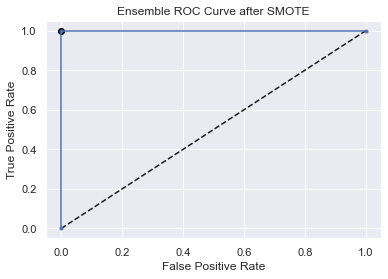


Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Ensemble ROC-AUC score After SMOTE: 1.0


In [28]:
#plot roc curve
fpr2, tpr2, thresholds2 = roc_curve(y_test, ensemble_smote.predict(X_test))
gmeans_nb_s = np.sqrt(tpr2 * (1-fpr2))
ix_nb_s = np.argmax(gmeans_nb)
y_hat_nb_s = np.where(ensemble_smote.predict(X_test) >= thresholds2[ix_nb], 1, 0)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr2, tpr2, marker='.', label='ensemble')
plt.scatter(fpr2[ix_nb_s], tpr2[ix_nb_s], marker='o', color='black', label='Best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Ensemble ROC Curve after SMOTE')
plt.show()
auc_smote = metrics.roc_auc_score(y_test, ensemble_smote.predict(X_test))
print("Ensemble ROC-AUC score After SMOTE:",auc_smote)

# LOGISTIC REGRESSION -Richa

In [29]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

In [30]:
#Model Evaluation using Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[200,   6],
       [  5,   4]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

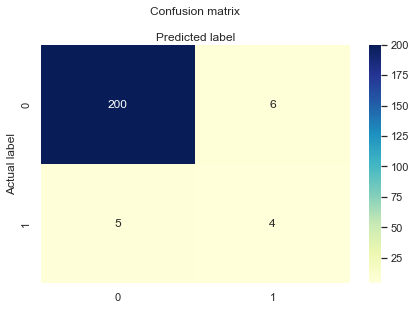

In [31]:
## Visualizing Confusion Matrix using Heatmap
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [32]:
## Confusion Matrix Evaluation Metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9488372093023256
Precision: 0.4
Recall: 0.4444444444444444


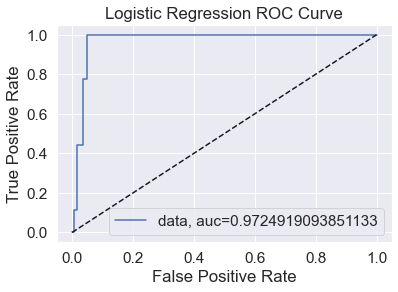

In [63]:
## ROC Curve
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data, auc="+str(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

# LOGISTIC REGRESSION WITH PCA -Richa

In [34]:
logreg1 = LogisticRegression()
# fit the model with data
logreg1.fit(X_pca_train,y_pca_train)
y_pred1=logreg1.predict(X_pca_test)

In [35]:
#Model Evaluation using Confusion Matrix
cnf_matrix1 = metrics.confusion_matrix(y_pca_test, y_pred1)
cnf_matrix1

array([[201,   5],
       [  5,   4]], dtype=int64)

Text(0.5, 12.5, 'Predicted label')

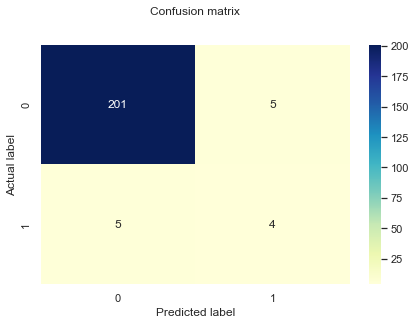

In [36]:
## Visualizing Confusion Matrix using Heatmap
class_names1=[0,1] # name  of classes
fig1, ax1 = plt.subplots()
tick_marks1 = np.arange(len(class_names1))
plt.xticks(tick_marks1, class_names1)
plt.yticks(tick_marks1, class_names1)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix1), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [37]:
## Confusion Matrix Evaluation Metrics
print("Accuracy:",metrics.accuracy_score(y_pca_test, y_pred1))
print("Precision:",metrics.precision_score(y_pca_test, y_pred1))
print("Recall:",metrics.recall_score(y_pca_test, y_pred1))

Accuracy: 0.9534883720930233
Precision: 0.4444444444444444
Recall: 0.4444444444444444


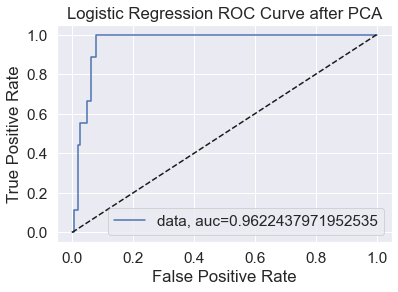

In [62]:
## ROC Curve
y_pred_proba1 = logreg1.predict_proba(X_pca_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_pca_test,  y_pred_proba1)
auc1 = metrics.roc_auc_score(y_pca_test, y_pred_proba1)
plt.plot(fpr,tpr,label="data, auc="+str(auc1))
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve after PCA')
plt.show()

# LOGISTIC REGRESSION WITH SMOTE -Richa

In [39]:
logreg2 = LogisticRegression()
# fit the model with data
# X_train_smote, y_train_smote = smote.fit_resample(X, y)
logreg2.fit(X_train_smote,y_train_smote)
y_pred2=logreg2.predict(X_test)
from sklearn import metrics
cnf_matrix2 = metrics.confusion_matrix(y_test, y_pred2)
cnf_matrix2

array([[197,   9],
       [  0,   9]], dtype=int64)

Text(0.5, 12.5, 'Predicted label')

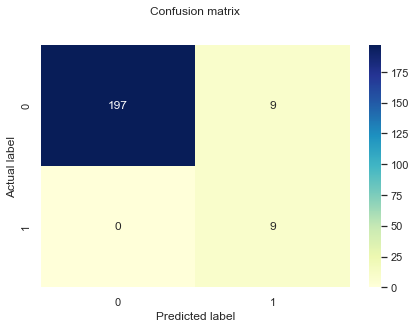

In [40]:
## Visualizing Confusion Matrix using Heatmap
class_names2=[0,1] # name  of classes
fig2, ax2 = plt.subplots()
tick_marks2 = np.arange(len(class_names2))
plt.xticks(tick_marks2, class_names2)
plt.yticks(tick_marks2, class_names2)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [41]:
## Confusion Matrix Evaluation Metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print("Precision:",metrics.precision_score(y_test, y_pred2))
print("Recall:",metrics.recall_score(y_test, y_pred2))

Accuracy: 0.958139534883721
Precision: 0.5
Recall: 1.0


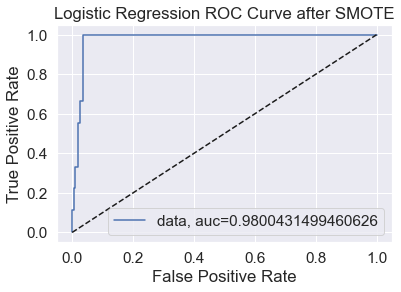

In [61]:
## ROC Curve
y_pred_proba2 = logreg2.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba2)
auc2 = metrics.roc_auc_score(y_test, y_pred_proba2)
plt.plot(fpr,tpr,label="data, auc="+str(auc2))
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve after SMOTE')
plt.show()

# RANDOM FOREST METHOD, NO SMOTE NO PCA -Rachel 

In [43]:
#creating a random forest model 
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
predictions=rf.predict(X_test)


In [44]:
accuracy_score(y_test,predictions)

0.958139534883721

In [45]:
print(classification_report(y_test, predictions))## Confusion Matrix Evaluation Metrics
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))


              precision    recall  f1-score   support

           0       0.99      0.97      0.98       206
           1       0.50      0.67      0.57         9

    accuracy                           0.96       215
   macro avg       0.74      0.82      0.77       215
weighted avg       0.96      0.96      0.96       215

Accuracy: 0.958139534883721
Precision: 0.5
Recall: 0.6666666666666666


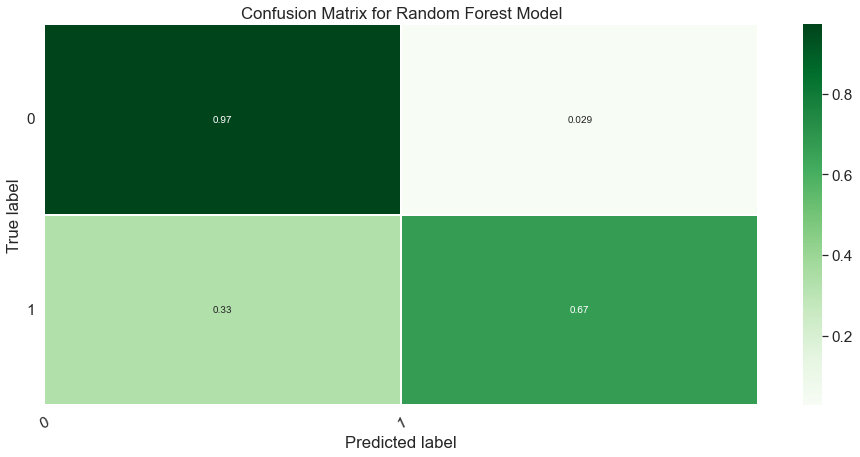

In [46]:
#confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, predictions)
matrixdf=pd.DataFrame(matrix)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = [0,1]
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [47]:
matrixdf=matrixdf.rename(columns={0:'Actual No',1:'Actual Yes'})
index=['Predicted No', 'Predicted Yes']
matrixdf.index=index
matrixdf

,Actual No,Actual Yes
Predicted No,200,6
Predicted Yes,3,6


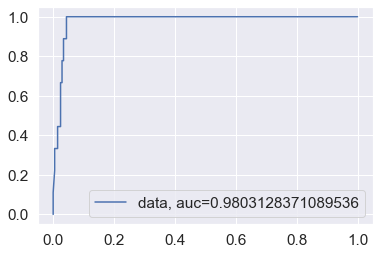

In [48]:
# ROC Curve

y_pred_proba = rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# RANDOM FOREST MODEL W/ PCA

In [49]:
#creating a random forest model 
rf_pca = RandomForestClassifier()
rf_pca.fit(X_pca_train, y_pca_train)
predictions=rf_pca.predict(X_pca_test)


In [50]:
accuracy_score(y_pca_test,predictions)
print(classification_report(y_pca_test, predictions))## Confusion Matrix Evaluation Metrics
print("Accuracy:",metrics.accuracy_score(y_pca_test, predictions))
print("Precision:",metrics.precision_score(y_pca_test, predictions))
print("Recall:",metrics.recall_score(y_pca_test, predictions))


              precision    recall  f1-score   support

           0       0.98      0.97      0.97       206
           1       0.42      0.56      0.48         9

    accuracy                           0.95       215
   macro avg       0.70      0.76      0.72       215
weighted avg       0.96      0.95      0.95       215

Accuracy: 0.9488372093023256
Precision: 0.4166666666666667
Recall: 0.5555555555555556


In [51]:
print(classification_report(y_pca_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       206
           1       0.42      0.56      0.48         9

    accuracy                           0.95       215
   macro avg       0.70      0.76      0.72       215
weighted avg       0.96      0.95      0.95       215



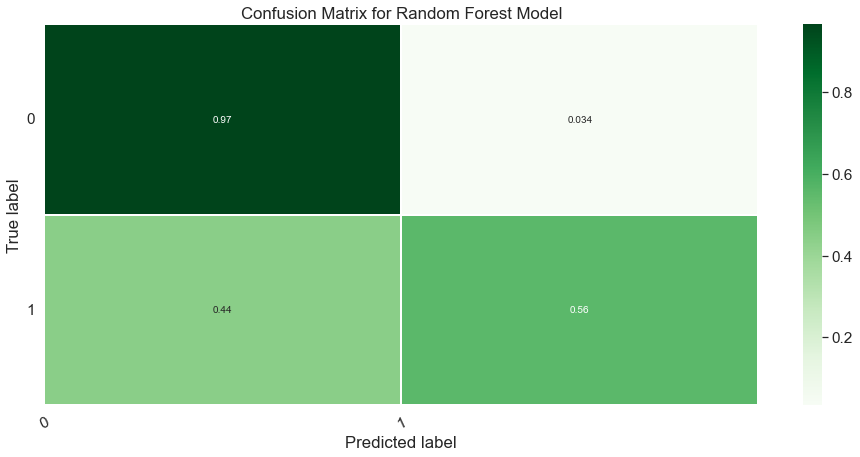

In [52]:
#confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get and reshape confusion matrix data
matrix = confusion_matrix(y_pca_test, predictions)
matrixdf=pd.DataFrame(matrix)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = [0,1]
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [53]:
matrixdf=matrixdf.rename(columns={0:'Actual No',1:'Actual Yes'})
index=['Predicted No', 'Predicted Yes']
matrixdf.index=index
matrixdf

,Actual No,Actual Yes
Predicted No,199,7
Predicted Yes,4,5


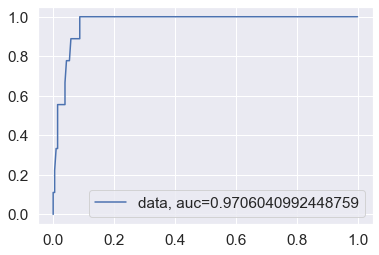

In [54]:
# ROC Curve

y_pred_proba = rf_pca.predict_proba(X_pca_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_pca_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_pca_test, y_pred_proba)
plt.plot(fpr,tpr,label="data, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# RANDOM FOREST MODEL USING SMOTE

In [55]:
 #creating a random forest model 
rf_smote = RandomForestClassifier()
rf_smote.fit(X_train_smote, y_train_smote)
predictions=rf_smote.predict(X_test)


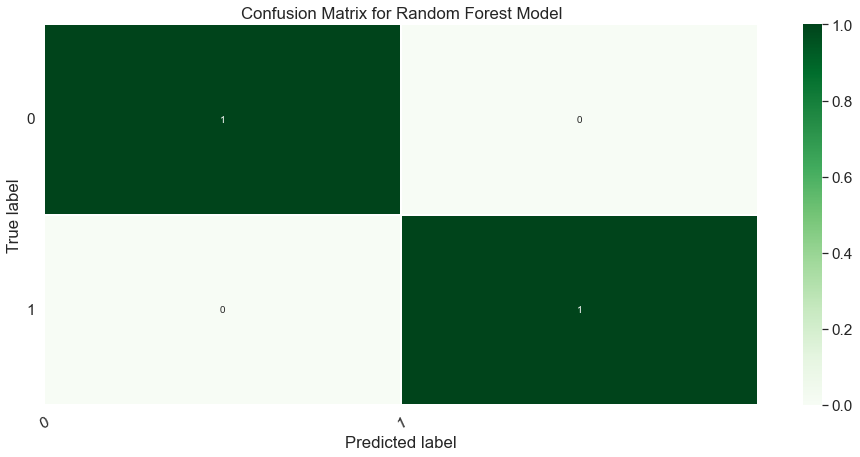

In [56]:
#confusion matrix
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, predictions)
matrixdf=pd.DataFrame(matrix)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = [0,1]
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [57]:
matrixdf=matrixdf.rename(columns={0:'Actual No',1:'Actual Yes'})
index=['Predicted No', 'Predicted Yes']
matrixdf.index=index
matrixdf

,Actual No,Actual Yes
Predicted No,206,0
Predicted Yes,0,9


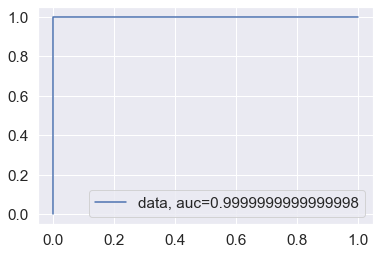

In [58]:
# ROC Curve

y_pred_proba = rf_smote.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [59]:
accuracy_score(y_test,predictions)

1.0

In [60]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       206
           1       1.00      1.00      1.00         9

    accuracy                           1.00       215
   macro avg       1.00      1.00      1.00       215
weighted avg       1.00      1.00      1.00       215

